n = 5
p = [3, 1, 2, 4, 5]
Pasos (Pn) = 2


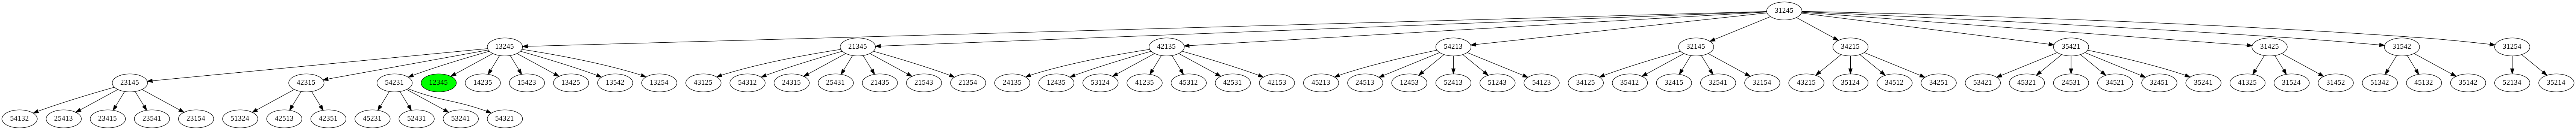

In [30]:
import random
import math
import pydot
from collections import defaultdict
from IPython.display import Image, display

pn = 0
sol = ""


def lstr(p):
    return ''.join([str(elem) for elem in p])


def contar(p, sol):
    pass


def ModifiedBFS(s):
    global pn, sol
    ordenado = False

    # Create dictionaries graph,visited and pydot graph G
    graph = defaultdict()
    visited = defaultdict()
    G = pydot.Dot(graph_type="digraph")

    # Create a queue for BFS
    queue = []

    # Mark the source node as visited and enqueue it
    queue.append(s)
    visited[lstr(s)] = True

    while queue and ordenado == False:

        # Dequeue a vertex from queue
        s = queue.pop(0)
        graph[lstr(s)] = []
        node = pydot.Node(lstr(s))
        G.add_node(node)

        # Get all adjacent vertices of the
        # dequeued vertex s. If a adjacent
        # has not been visited, then mark it
        # visited and enqueue it
        if (s != sorted(s)):

            # modificación para dos spatulas
            for i in range(len(s) - 1):
                for j in range(i, len(s) - 1):
                    d = s[i+1::-1] + s[i+2:]  
                    if i== 0:
                      d = s[:i] + s[j+1::-1] + s[j+2:]
                    else :
                      d = s[:i] + s[j+1:i-1:-1] + s[j+2:]

                    #print(d)
                    if (d != s) and not (lstr(d) in visited.keys()):

                        if (d != sorted(d)):

                            node = pydot.Node(lstr(d))
                        else:
                            node = pydot.Node(lstr(d), style="filled", fillcolor="green")  # first sorted green
                            sol = lstr(d)

                        G.add_node(node)
                        edge = pydot.Edge(lstr(s), lstr(d))
                        G.add_edge(edge)
                        graph[lstr(s)].append(lstr(d))
                        queue.append(d)
                        visited[lstr(d)] = True
        else:
            ordenado = True

    while sol != lstr(p):
        for i in graph.values():
            if sol in i:
                sol = i
                # print(sol)
                pn += 1
                sol = list(graph.keys())[list(graph.values()).index(sol)]
    print("Pasos (Pn) = " + str(pn))

    # Dsplay the pydot graph G
    im = Image(G.create_png())
    display(im)


n = 5
p = [1, 2, 3, 4,5]
while n == 5:
    random.shuffle(p)
    print("n = " + str(len(p)))
    print("p = " + str(p))
    ModifiedBFS(p)
    n += 1
    p.append(n)